In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.columns = ['News_ID','Title','Text','Label']     
df.head(11)

,News_ID,Title,Text,Label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.isnull().sum()

News_ID    0
Title      0
Text       0
Label      0
dtype: int64

In [6]:
df.dtypes

News_ID     int64
Title      object
Text       object
Label      object
dtype: object

In [7]:
d1 = df['Label'].value_counts()
d1

REAL    3171
FAKE    3164
Name: Label, dtype: int64

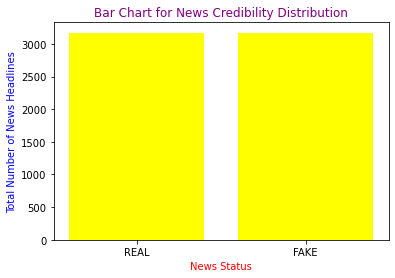

In [8]:
plt.bar(d1.index,d1,color="Yellow")
plt.xlabel('News Status',color='Red')
plt.ylabel('Total Number of News Headlines',color='Blue')
plt.title('Bar Chart for News Credibility Distribution',color="Purple")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()

In [11]:
df['News_ID'] = lb.fit_transform(df['News_ID'])
df['Title'] = lb.fit_transform(df['Title'])
df['Text'] = lb.fit_transform(df['Text'])
df.dtypes

News_ID     int64
Title       int32
Text        int32
Label      object
dtype: object

In [12]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(x.shape,y.shape)
print(type(x),type(y))

(6335, 2) (6335,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [13]:
x.head()

,Title,Text
0,6155,1514
1,5747,2185
2,2946,5165
3,653,5991
4,4788,2733


In [14]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: Label, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(4751, 2)
(1584, 2)
(4751,)
(1584,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
def apply_model(model):
    model.fit(x_tr,y_tr)
    print('Accuracy',model.score(x_te,y_te))
    ypred = model.predict(x_te)
    print('Predicted values\n',ypred)
    cm = confusion_matrix(y_te,ypred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(y_te,ypred))

Accuracy 0.5246212121212122
Predicted values
 ['REAL' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'REAL']
Confusion Matrix
 [[269 541]
 [212 562]]


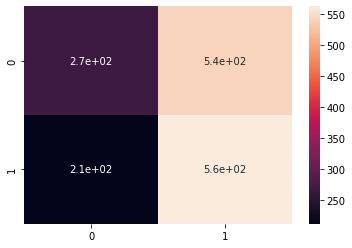

Classification report
               precision    recall  f1-score   support

        FAKE       0.56      0.33      0.42       810
        REAL       0.51      0.73      0.60       774

    accuracy                           0.52      1584
   macro avg       0.53      0.53      0.51      1584
weighted avg       0.53      0.52      0.51      1584



In [20]:
# 1) LogReg
m1 = LogisticRegression()
apply_model(m1)

Accuracy 0.6117424242424242
Predicted values
 ['FAKE' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
Confusion Matrix
 [[247 563]
 [ 52 722]]


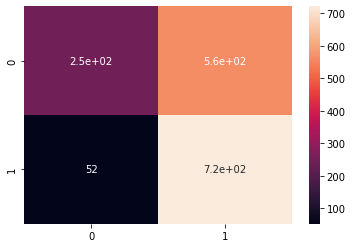

Classification report
               precision    recall  f1-score   support

        FAKE       0.83      0.30      0.45       810
        REAL       0.56      0.93      0.70       774

    accuracy                           0.61      1584
   macro avg       0.69      0.62      0.57      1584
weighted avg       0.70      0.61      0.57      1584



In [21]:
# 2) Decision Tree
m2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m2)

Accuracy 0.6199494949494949
Predicted values
 ['FAKE' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
Confusion Matrix
 [[259 551]
 [ 51 723]]


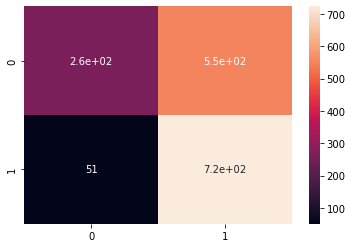

Classification report
               precision    recall  f1-score   support

        FAKE       0.84      0.32      0.46       810
        REAL       0.57      0.93      0.71       774

    accuracy                           0.62      1584
   macro avg       0.70      0.63      0.58      1584
weighted avg       0.70      0.62      0.58      1584



In [22]:
# 3) Random Forest
m3 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m3)

In [ ]:
# 4) SVC
m4 = SVC(kernel='linear',C=1)
apply_model(m4)

Accuracy 0.639520202020202
Predicted values
 ['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']
Confusion Matrix
 [[537 273]
 [298 476]]


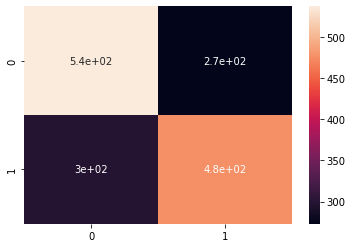

Classification report
               precision    recall  f1-score   support

        FAKE       0.64      0.66      0.65       810
        REAL       0.64      0.61      0.63       774

    accuracy                           0.64      1584
   macro avg       0.64      0.64      0.64      1584
weighted avg       0.64      0.64      0.64      1584



In [23]:
# 5) KNN
m5 = KNeighborsClassifier(n_neighbors=27)
apply_model(m5)

In [28]:
print("The model for which the Fake News Detector Project has the highest accuracy is 'KNN Model' with an accuracy of 0.639520202020202 !!!!")

The model for which the Fake News Detector Project has the highest accuracy is 'KNN Model' with an accuracy of 0.639520202020202 !!!!
